# Scientific Computing 

## Question 1
### Part A

In [1]:
from CommonModules import *
import warnings
import SciCompSoftware as scs
warnings.filterwarnings('ignore') #Aesthetic choice only - notebooks seem to dislike mixing latex and f strings

In [2]:
def Bruselator(x,t,B,A=1):
    dxdt = A +(x[0]**2)*x[1] -(B+1)*x[0]
    dydt = B*x[0]-(x[0]**2)*x[1]
    return np.array([dxdt,dydt])


Text(0.5, 1.0, ' Brusselator Time Series \n  ICs=(1, 1),B=3,over T$ \\in $(0, 20)')

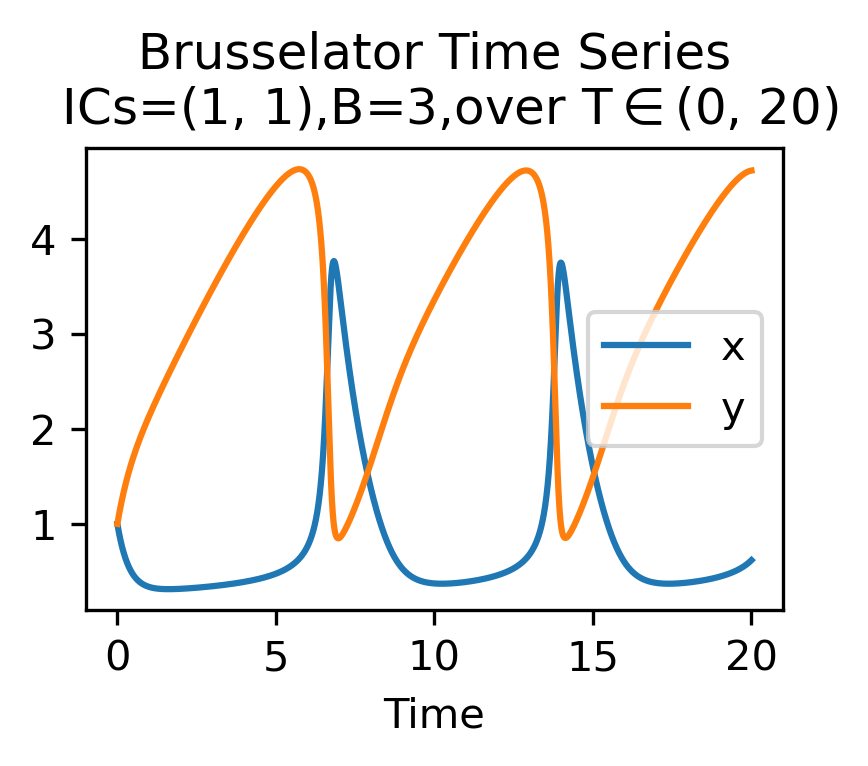

In [3]:
InitialConditions = (1,1)
TimeSpan = (0,20)
BruselatorAtThree = lambda x,t: Bruselator(x,t,B=3)
XY, Time = scs.ODESolver.Solve_to(BruselatorAtThree,InitialConditions,TimeSpan)
plt.figure(figsize=(3,2),dpi=300)
plt.plot(Time,XY[0,:],label="x")
plt.plot(Time,XY[1,:],label="y")
plt.legend()
plt.xlabel("Time")

plt.title(f" Brusselator Time Series \n  ICs={InitialConditions},B=3,over T$ \in ${TimeSpan}")

> Small note: the SyntaxWarning comes from cpython misidentifying latex, the code still runs as expected

As seen from the above graph, the system enters a limit cycle with a period of $\approx6$ with a turning point at $x\approx4$ and $y\approx1$

### Part B

7.1579199099949555


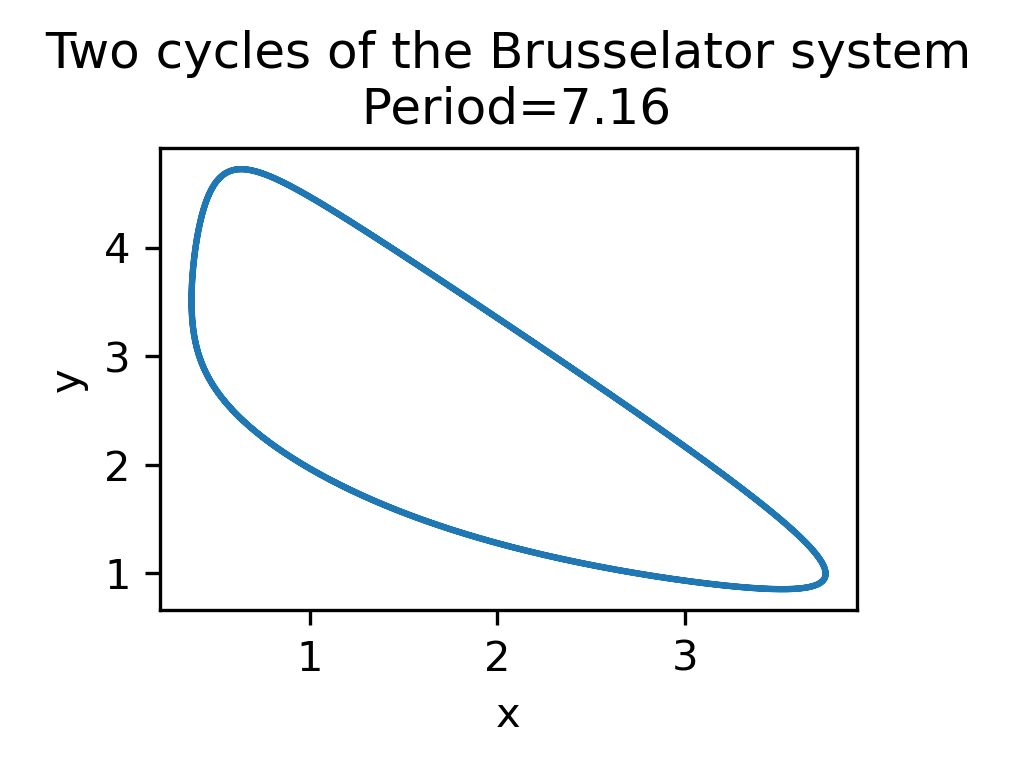

In [4]:
import Week16General
GuessTimePeriod = 6
GuessICs = (4,1)
CycleXY,CyclePeriod = scs.Shooting(BruselatorAtThree,GuessICs,GuessTimePeriod)

#InitialConditions = (
#TimeSpan = (0,20)
CycleTwoPeriods = (0,CyclePeriod*2)

BruselatorAtThree = lambda x,t: Bruselator(x,t,B=3)
XY, Time = scs.ODESolver.Solve_to(BruselatorAtThree,CycleXY,CycleTwoPeriods)
plt.figure(figsize=(3,2),dpi=300)
plt.plot(XY[0,:],XY[1,:])
plt.xlabel("x")
plt.ylabel("y")
#plt.legend()
#plt.xlabel("Time")

plt.title(f" Two cycles of the Brusselator system \n Period={CyclePeriod:.2f}")
print(CyclePeriod)




As shown above, the system has a period of approximately 7.16 

In [5]:
#import Week17Continuation
InitialConditions = np.hstack((CycleXY,CyclePeriod))
SolnXYT,BValues = scs.Continuation.NaturalContinuation(Bruselator,InitialConditions
                                                        ,Param0=3,ParamStepSize=-0.05
                                                        ,ParamNSteps = 20
                                                        ,SolverStepSize = 0.01
                                                        ,WithShooting=1)

In [6]:
"""Working forwards from 2"""
NewICs = np.hstack((SolnXYT[-1,:-1],0.01))
NewParam0 = BValues[-1]
NewSolnXYT,NewBValues = scs.Continuation.NaturalContinuation(Bruselator,NewICs
                                                        ,Param0=NewParam0,ParamStepSize=0.1
                                                        ,ParamNSteps = 10
                                                        ,SolverStepSize = 0.0001
                                                        ,WithShooting=1)

To find the fixed points of the bifurcations I tried to use a much lower time period, finding fixed arms that match exactly with $y=B$, $x=1$. I imagine this bottom line being equal to 1 is also connected to the value of A. Dotted lines in the below plot are not a comment on stability and simply used to distinguish the two

Text(0.5, 0, 'Value of B')

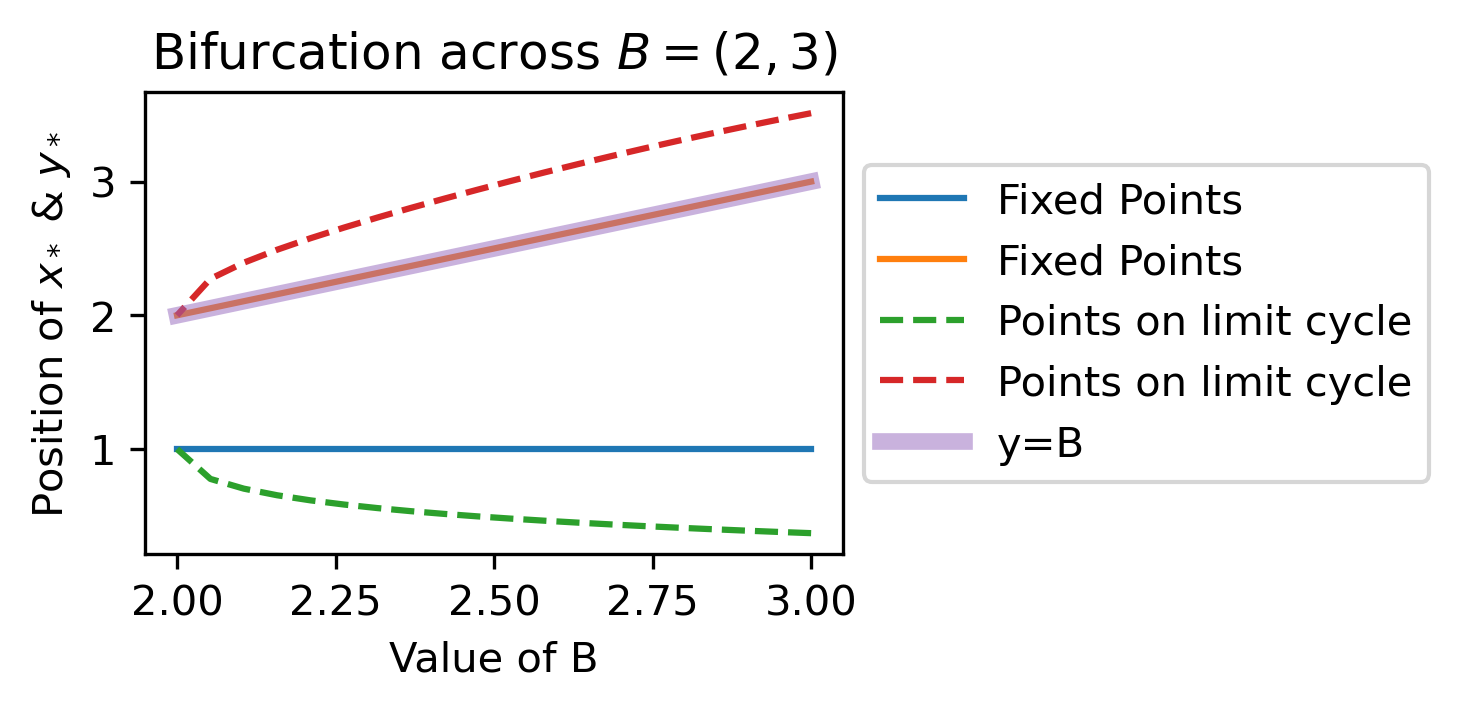

In [7]:
plt.figure(figsize=(3,2),dpi=300)
plt.plot(NewBValues,NewSolnXYT[:,:-1],label="Fixed Points")
plt.plot(BValues,SolnXYT[:,:-1],linestyle='--',label="Points on limit cycle")
plt.plot(BValues,BValues,label="y=B",linewidth=4,alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Bifurcation across $B=(2,3)$")
plt.ylabel("Position of $x_*$ $&$ $y_*$")
plt.xlabel("Value of B")

## Question 2
### Part A


In [8]:
def ExtendedHopf(xyz,t,Beta=1):
    R = xyz[0]**2+xyz[1]**2+xyz[2]**2
    dx = Beta*xyz[0] -xyz[1] -xyz[2] +xyz[0]*R -xyz[0]*(R**2)
    dy = xyz[0] +Beta*xyz[1] -xyz[2] +xyz[1]*R -xyz[1]*(R**2)
    dz = xyz[0] +xyz[1] +Beta*xyz[2] +xyz[2]*R -xyz[2]*(R**2)
    return np.array([dx,dy,dz],dtype=np.longdouble)



In [9]:
InitialConditions = (1,0,-1)
TimeSpan = (0,10)
XYZ ,Time = scs.ODESolver.Solve_to(ExtendedHopf,InitialConditions,TimeSpan)


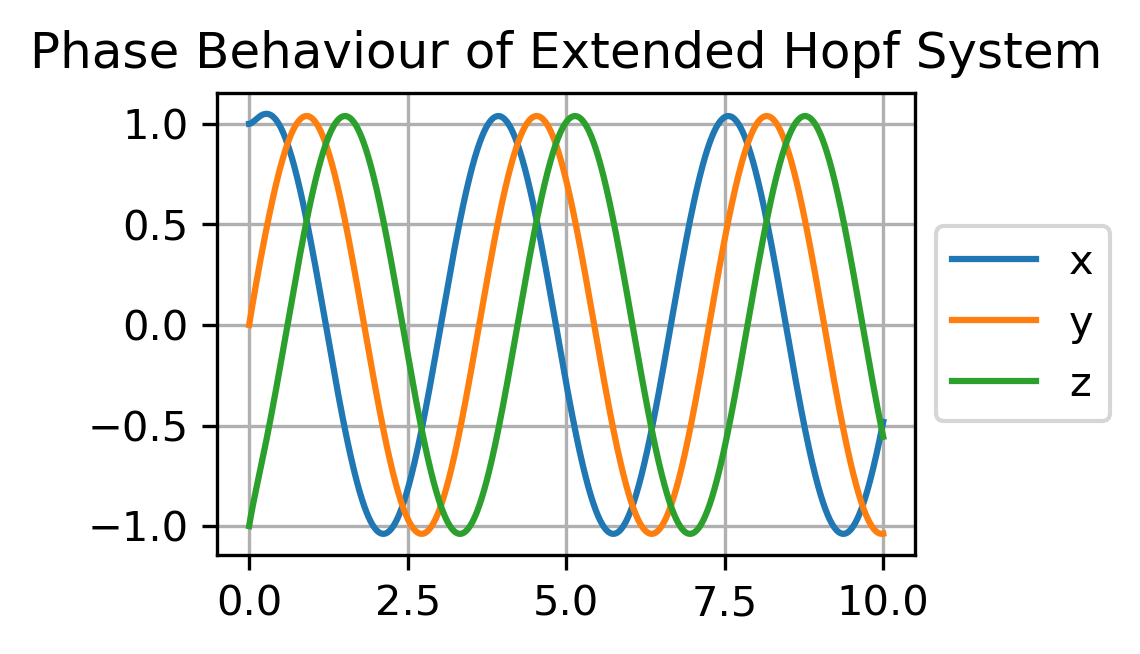

In [10]:
plt.figure(figsize=(3,2),dpi=300)
plt.plot(Time,XYZ.T,label=("x","y","z"))
#plt.plot((2.1,2.1),(-1.2,1.2),linestyle="--",linewidth=4,alpha=0.5,label="Initial Guess")
plt.title("Phase Behaviour of Extended Hopf System")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Part B
From the above plot I expect a limit cycle at $(x,y,z)\approx (-1,-0.4,0.5)$ with a period of $T\approx4$

This system has an oscilation period of 3.63


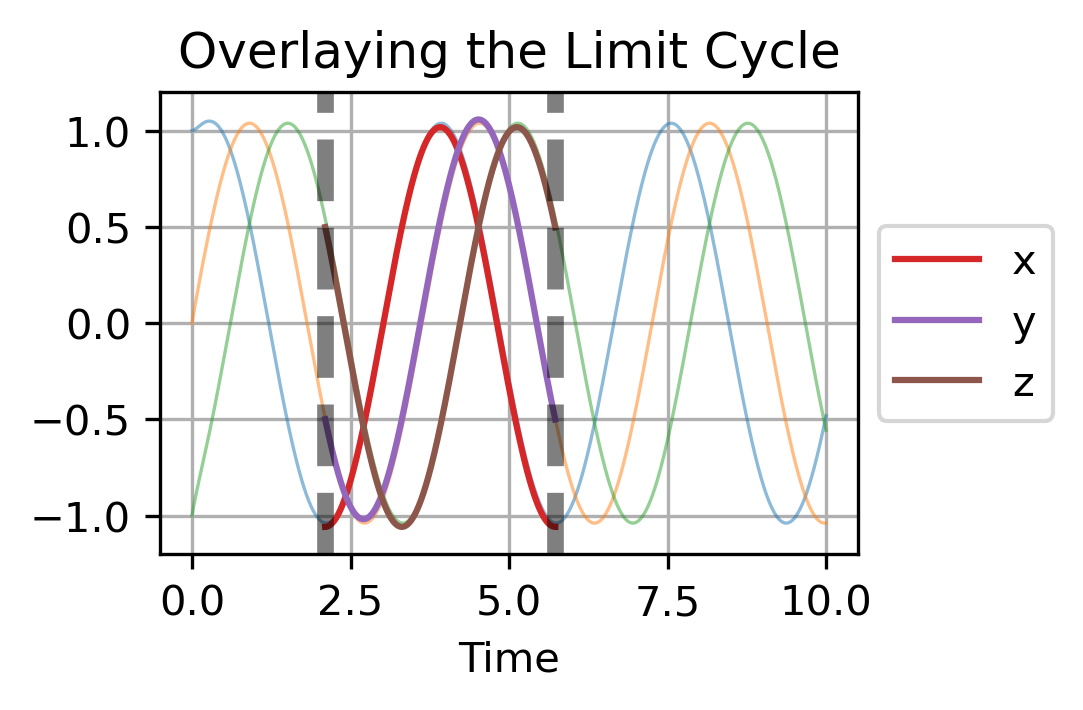

In [11]:
GuessXYZ = (-1,-0.5,0.5)
GuessT = 3.9

CycleXYZ ,CycleT = scs.Shooting(ExtendedHopf,GuessXYZ,GuessT)
NewXYZ,NewTime = scs.ODESolver.Solve_to(ExtendedHopf,CycleXYZ,(0,CycleT))
plt.figure(figsize=(3,2),dpi=300)
plt.plot(Time,XYZ.T,alpha=0.5,linewidth=0.8)
plt.plot(NewTime+2.1,NewXYZ.T,label=("x","y","z"))
plt.plot((2.1,2.1),(-1.2,1.2),linestyle="--",linewidth=4,alpha=0.5,color='k')
plt.plot((2.1+CycleT,2.1+CycleT),(-1.2,1.2),linestyle="--",linewidth=4,alpha=0.5,color='k')
plt.title("Overlaying the Limit Cycle")
plt.ylim((-1.2,1.2))
plt.xlabel("Time")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(f"This system has an oscilation period of {CycleT:.2f}")


Text(0.5, 0.92, 'One limit cycle of the extended form Hopf system ')

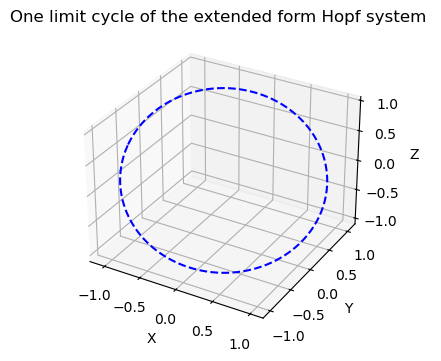

In [12]:

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d',)
ax.plot(NewXYZ[0], NewXYZ[1], NewXYZ[2], linestyle='--', color='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('One limit cycle of the extended form Hopf system ')

> Time Period = 3.63 for x, y, z = -1, -0.5, 0.5
### Part C

In [13]:
#import Week17Continuation

In [ ]:
InitialConditions = np.hstack((CycleXYZ,CycleT))
#InitialConditions = (0,0,0,0.1)
#AllSoln = InitialConditions

SolnXYZT,ParameterValues = scs.Continuation.ShootingArcLengthCont(
    ExtendedHopf,InitialConditions,(1,-1),ContinuationMaxSteps=250,ParamStepSize=0.021 
    ,SolverStepSize=0.001)


In [ ]:
plt.title("Bifuraction Diagram of the extended Hopf equation")
plt.plot(ParameterValues[:-1],SolnXYZT[:-1,:-1],label=("x","y","z"))#,"t"))
plt.xlabel("B Value")
plt.ylabel("Limit cycle location")
plt.legend()
plt.grid()
plt.xlim((-1,1))


## Question 3
### Part A

In [ ]:


sigma=0.5

def QuestionThreeSourceTerm(x,u):
    coeff = (1/(math.sqrt(2*math.pi*(sigma**2))))
    exponent = np.exp(-1*(np.square(x))/(2*(sigma**2)))
    return coeff*exponent

LeftBC = ("Dirilecht",-1) 

RightBC =("Dirilecht",-1)

X,U = scs.FiniteDifferences(LeftBC=LeftBC,LeftBCLocation=-1,
                                            RightBC=RightBC,RightBCLocation=1,
                                            NPoints=51,Reaction=QuestionThreeSourceTerm)

print(f"At U(0)={U[np.where(X==0)]}")



In [ ]:

plt.figure()
plt.plot(X,U,label=f"Part $i$")
plt.legend()
plt.xlim((-1,1))
plt.title("Poission Equation")
plt.xlabel("x")
plt.ylabel("u(x)")
#plt.ylim((-1,0))
plt.grid()


### Part B

In [ ]:
import timeit
sigma = 0.05
%timeit scs.FiniteDifferences(LeftBC=LeftBC,LeftBCLocation=-1,RightBC=RightBC,RightBCLocation=1,NPoints=501,Reaction=QuestionThreeSourceTerm)


The time taken for the explicit Euler method, without the implementation of sparse linear algebra , will preform slower than the same function with sparse linear algebra. This is due to the reduced memory demands and the increased speed of the necessary matrix operations.

## Question 4
### Part A
For an unspecified number of timesteps I automatically compute delta T. Here is a section of my code that assigns the correct value, copy and pasted from ExplicitEuler.py -modified to run outside the function

In [ ]:
TimeLimit = 0.5
DiffusionConstant = 0.5
LeftBCLocation =0
RightBCLocation = 2
NPoints = 101
DeltaX = (RightBCLocation-LeftBCLocation)/NPoints
MaxDeltaT = (1/DiffusionConstant)*(DeltaX**2)*(1/2)
print(f'For Explicit Euler, Delta T Max = {float(f"{MaxDeltaT:.4g}"):g}')
NTimeSteps = math.ceil(TimeLimit/(MaxDeltaT/2))
print(f'This requires {NTimeSteps} Time Steps')

In [ ]:
NTimeSteps = math.ceil(TimeLimit/(MaxDeltaT/2))
LeftBC = ("Neuman",1)
RightBC = ("Dirilecht",0)

def QuestionFourICs(x):
    return x*(RightBCLocation-x)*(1/2)


In [ ]:

#import ExplicitEuler
X,T,U = scs.PDEMethods.MethodOfLines(LeftBC=LeftBC,LeftBCLocation=LeftBCLocation,
                                    RightBC=RightBC,RightBCLocation=RightBCLocation,
                                    NPoints=NPoints,
                                    NTimeSteps=NTimeSteps,
                                    TimeLimit=TimeLimit,
                                    InitalConditions=QuestionFourICs,
                                    DiffusionConstant=DiffusionConstant
                                    )
plt.plot(T,U[:,0],label="Explicit",linestyle="--",lw=2)
ImpX,ImpT,ImpU = scs.PDEMethods.MethodOfLines(LeftBC=LeftBC,LeftBCLocation=LeftBCLocation,
                                    RightBC=RightBC,RightBCLocation=RightBCLocation,
                                    NPoints=NPoints,
                                    NTimeSteps=int(math.floor(0.5*NTimeSteps)),
                                    TimeLimit=TimeLimit,
                                    Implicit=1,
                                    InitalConditions=QuestionFourICs,
                                    DiffusionConstant=DiffusionConstant
                                    )
plt.plot(ImpT,ImpU[:,0],label="Implicit",linestyle="-.",lw=2)
plt.xlabel("Time t")
plt.ylabel("U(0,t)")
plt.grid()
plt.legend()
plt.title(f"Solution U(x,t) at x=0, across $t\in [0,1]$")
print(f'For Explicit Euler U(0,T) = {float(f"{U[-1,0]:.4g}"):g}')
print(f"For Implicit Euler U(0,T) = {float(f"{ImpU[-1,0]:.4g}"):g}")

Linear behavior makes sense for fixed derivative  with respect to time

## Question 5
### Part A


In [ ]:

LeftBC =("N",0)
RightBC = LeftBC
DiffusionConstant = 0.01
QuestionFiveICs = lambda x:0*x
def QuestionFiveSourceTerm(x,u):
    coef = np.square(1-u)
    exponent = np.exp(x*-1)
    return np.multiply(coef,exponent)


In [ ]:

expX,expT,expU = scs.PDEMethods.MethodOfLines(LeftBC=LeftBC,LeftBCLocation=0,
                                    RightBC=RightBC,RightBCLocation=6,
                                    NPoints=101,
                                    NTimeSteps=28000,
                                    TimeLimit=100,
                                    InitalConditions=QuestionFiveICs,
                                    ReactionTerm = QuestionFiveSourceTerm,
                                    DiffusionConstant=DiffusionConstant
                                    )


rungeX,rungeT,rungeU = scs.PDEMethods.MethodOfLines(LeftBC=LeftBC,LeftBCLocation=0,
                                    RightBC=RightBC,RightBCLocation=6,
                                    NPoints=101,
                                    #NTimeSteps=1000, 
                                    TimeLimit=100,
                                    InitalConditions=QuestionFiveICs,
                                    ReactionTerm = QuestionFiveSourceTerm,
                                    DiffusionConstant=DiffusionConstant,
                                    Runge=1,
                                    Euler=0
                                    )


impX,impT,impU = scs.PDEMethods.MethodOfLines(LeftBC=LeftBC,LeftBCLocation=0,
                                    RightBC=RightBC,RightBCLocation=6,
                                    NPoints=101,
                                    NTimeSteps=99,
                                    TimeLimit=100,
                                    InitalConditions=QuestionFiveICs,
                                    ReactionTerm = QuestionFiveSourceTerm,
                                    Implicit=1,
                                    DiffusionConstant=DiffusionConstant
                                    )

print(f'Implicit U:(L,T) = {float(f"{impU[-1,-1]:.4g}"):g}')
print(f'Explicit Euler: U(L,T) = {float(f"{expU[-1,-1]:.4g}"):g}')
print(f'Explicit RK4: U(L,T) = {float(f"{rungeU[-1,-1]:.4g}"):g}')

In [ ]:

plt.plot(expX,expU[-1,:],label="Explicit Euler")
plt.plot(rungeX,rungeU[-1,:],label="Explicit w/ Runge-Kutta4")
plt.plot(impX,impU[-1,:],label="Implicit Euler")
#plt.plot()
plt.xlabel(f"Position $x^T$")
plt.ylabel("U(x,T)")
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.title(f"Solution U(x,t) at t=T, across $x\in [0,6]$")


In [ ]:
%%timeit
expX,expT,expU = scs.PDEMethods.MethodOfLines(LeftBC=LeftBC,LeftBCLocation=0,
                                    RightBC=RightBC,RightBCLocation=6,
                                    NPoints=101,
                                    NTimeSteps=27182,
                                    TimeLimit=100,
                                    InitalConditions=QuestionFiveICs,
                                    ReactionTerm = QuestionFiveSourceTerm,
                                    DiffusionConstant=DiffusionConstant
                                    )



In [ ]:
%%timeit
rungeX,rungeT,rungeU = scs.PDEMethods.MethodOfLines(LeftBC=LeftBC,LeftBCLocation=0,
                                    RightBC=RightBC,RightBCLocation=6,
                                    NPoints=101,
                                    #NTimeSteps=1000, 
                                    TimeLimit=100,
                                    InitalConditions=QuestionFiveICs,
                                    ReactionTerm = QuestionFiveSourceTerm,
                                    DiffusionConstant=DiffusionConstant,
                                    Runge=1,
                                    Euler=0
                                    )


In [ ]:
%%timeit

impX,impT,impU = scs.PDEMethods.MethodOfLines(LeftBC=LeftBC,LeftBCLocation=0,
                                    RightBC=RightBC,RightBCLocation=6,
                                    NPoints=101,
                                    NTimeSteps=100,
                                    TimeLimit=100,
                                    InitalConditions=QuestionFiveICs,
                                    ReactionTerm = QuestionFiveSourceTerm,
                                    Implicit=1,
                                    DiffusionConstant=DiffusionConstant
                                    )


### Part B
Times for each method were as follows 
>Explicit Euler: $\approx2s$ \
>Explicit w/Rk4: $\approx0.3s$ \
>Implicit Euler: $\approx1s$ 

I would favour implementing my explicit method with Runge-Kutta for solving my system across seperate values of D. Whilst implicit euler should be preferable, the large time period in the question seems to negatively effect my solution accuracy if I used too few time steps within my implicit system. Another factor was implementation issues, I should have chosen a different solver for my implicit method as $scipy.optimize.root$ was not optimal for problems of this type.
This faster performance is at the cost of some accuracy, however for problems involving a large number of parameters loss of accuracy at the 3rd decimal point seems less important when considering the more than $3\times$ speed increase from the next method.

### Part C

In [ ]:
print(f'Implicit U:(L,T) = {float(f"{impU[-1,-1]:.4g}"):g}')
print(f'Explicit Euler: U(L,T) = {float(f"{expU[-1,-1]:.4g}"):g}')
print(f'Explicit RK4: U(L,T) = {float(f"{rungeU[-1,-1]:.4g}"):g}')

Evaluating the three methods chosen at the time, both my values for Implicit and explicit Euler agree. I therefore find the value of $U(L,T) = 0.3724$

## Question 6
### Part A

In [ ]:
LeftBC = ("D",0)
RightBC = ("D",1/2)
Peclet = 1
def QuestionSixSourceTerm(x,u,Peclet=1):
    u=np.r_[LeftBC[1],u]
    u= np.r_[u,RightBC[1]]
    StepSize = abs(x[1]-x[0])
    dx = np.zeros(shape=np.shape(u))
    for i in range(1,len(u)-1):
        dx[i] = (u[i+1]-u[i-1])/(2*StepSize)
    return Peclet*(1-dx[1:-1])  


Here I implemented this as a special case of the diffusion equation, defining the du/dx term only using finite difference methods.

In [ ]:
PecletValues = (1,10,50)
#import FiniteDifferences
for i in PecletValues:
    CurrentSourceTerm = lambda x,u : QuestionSixSourceTerm(x,u,Peclet=i)
    X,U = scs.FiniteDifferences(LeftBC=LeftBC,LeftBCLocation=0,
                                                RightBC=RightBC,RightBCLocation=1,
                                                NPoints=81,
                                                Reaction=CurrentSourceTerm)
    plt.plot(X,U,label=f"P={i}")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("u")
plt.title(f"Solution u(x) for P ={PecletValues}")

I did not integrate my finite difference code within my shooting module ,so instead I took the naive approach, which produces the following curve 

In [ ]:
ParameterValues = np.linspace(1,50)
MaxValue = np.zeros(len(ParameterValues))
for i,j in enumerate(ParameterValues):
    CurrentSourceTerm = lambda x,u : QuestionSixSourceTerm(x,u,Peclet=j)
    X,U = scs.FiniteDifferences(LeftBC=LeftBC,LeftBCLocation=0,
                                                RightBC=RightBC,RightBCLocation=1,
                                                NPoints=81,
                                                Reaction=CurrentSourceTerm)
    MaxValue[i] = U.max()
plt.plot(ParameterValues,MaxValue)
plt.legend()
plt.grid()
plt.xlabel("P")
plt.ylabel("$x_{max}$")
plt.title(f"Max value u(x) for $1\leq P\leq50$")

# Design Decisions 

## Producing a Cohesive Package 

To minimise confusion for the end user the code was packaged together into one module, *SciCompSoftWare* . This module helped reorganise the scripts produced into a single import, improving clarity and addressing previous inconsistencies within naming conventions. Documentation is provided for the module as a whole, with more detailed documentation defined for  each individual function, allowing for greater readability. 

## Arguments 

Where possible, optional arguments were implemented to accommodate users unfamiliar with the program's structure. Most of the software included options for step size, the integrators used and other module specific parameters. Each module included default values for as many parameters as possible, with checks on values such as initial conditions to ensure compatibility.  

## Error Handling 

A variety of error handling and mitigation strategies were implemented in the software, with an emphasis on useful feedback. For example, if the shooting module fails to converge the error message of the solver is returned, as well as suggestion of the parameters to modify to improve the results.  If errors arose within a system that produces multiple solutions, i.e. numerical continuation, any valid solutions were still returned. These partial solutions were helpful in refining the implementation of these methods, often allowing me to locate and understand any errors that arose. 

## Compatibility 

Designing code to be explicitly reusable took some practice and was a skill that improved greatly as the course continued. One main method to allow for resuability was the use of argument flags were often used to switch between different modes of operation. The numerical continuation method made strong use of this, with separate wrappers to allow for different discretisations of the problem. The shooting root finding problem was created as its own function, reused in several of my ODE solving methods. 

A similar emphasis on reusability can be seen in my formulation of the finite difference methods. A single function was created to calculate the Axx matrix and Bxx vector used in each of these problems, avoiding unnecessary repetition. 

## Data Types 

Most outputs were in the form of NumPy arrays, both due to familiarity to introduce internal consistency. Experimentation was made using higher precision datatypes, such as *np.longdouble*, although no increase in accuracy was noticed relative to the loss in performance .

## Problem Specific Choices 

### Boundary Conditions 

After several failed attempts, the current implementation of boundary conditions is as follows: the user inputs a tuple containing both the type of boundary condition and any relevant parameters to describe it, as well as the x coordinate of both the left and right boundary.  

### Time Steps 

Timestep sizes had massive effects on the stability of the solution achieved, and as such were carefully considered. In the main ODE integrator, the value of timestep provided is only the upper limit of $\Delta T$ – if this step size would split the integration interval into a non-integer number of timesteps it was reduced to completely fill the interval. Similar concerns about timestep stability are also addressed in the explicit Euler method; if not specified by the user a stable timestep is calculated automatically, if the user does specify a value it is checked before use, raising an error if incorrect. 

### Source/Reaction terms 

When solving PDE problems, source terms were a great source of frustration. As such each method was built with source terms in mind. Included as a default argument was a zero source term ($u(x,t)=0$) to ensure no modification was needed to included these terms within any of the methods. These terms could be easily implemented by the user, allowing for results such as those seen in question 6, where a first order ODE could be implemented using simple finite difference methods.  

### Pseudo Arc-Length 

To implement pseudo arc length methods required the use of the local scope of python functions. Instead of defining a unique arc length RHS function, the root finding problem was defined inside a nested function within the original code. This reduced the complexity needed when passing arguments to the root finding function, without effecting the reusability of the code as this root finding problem was incredibly specific to the task at hand. The user was also able to define the step size for the first two shooting problems, as well as the scope of each problem 

### Profiling  

A limited use of profilers was made throughout the development of each module, although the comparisons made were of limited utility without full context. Implementing profiling methods to the solutions given for question 6 of the demos was more revealing, as it contextualized the performance of individual methods. Surprisingly, in context my RK4 implementation was significantly faster than either implicit or explicit Euler. Profiling the code revealed the source for this discrepancy, as *scipy.optimize.root* is a relatively inefficient way of finding the solution. 

 

 